##  2. Basic Matrix/Vector Manipulation

In [58]:
import numpy as np
import numpy.matlib as matlib
import matplotlib.pyplot as plt

%matplotlib inline


In [67]:
# ===== Problem 2a =====
# Define Matrix M and Vectors a,b,c in Python with NumPy

M, a, b, c = None, None, None, None

# BEGIN YOUR CODE HERE

M = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [0, 2, 2]])
a = np.array([1, 1, 0])
b = np.array([-1, 2, 5])
c = np.array([0, 2, 3, 2])

print('M = %s' % M)
print('a = %s' % a)
print('b = %s' % b)
print('c = %s' % c)
# END YOUR CODE HERE

M = [[1 2 3]
 [4 5 6]
 [7 8 9]
 [0 2 2]]
a = [1 1 0]
b = [-1  2  5]
c = [0 2 3 2]


In [68]:
# ===== Problem 2b =====
# Find the dot product of vectors a and b, save the value to aDotb

aDotb = None

# BEGIN YOUR CODE HERE

aDotb = np.dot(a, b)
print('(b) = %s' % aDotb)

# END YOUR CODE HERE

(b) = 1


In [69]:
# ===== Problem 2c =====
# Find the element-wise product of a and b

# BEGIN YOUR CODE HERE
print ('(c) = %s' % (a * b))
# END YOUR CODE HERE


(c) = [-1  2  0]


In [70]:
# ===== Problem 2d =====
# Find (a^T b)Ma

# BEGIN YOUR CODE HERE
print ('(d) = %s' % (np.dot(np.dot(np.dot(a,b), M), a)))
# END YOUR CODE HERE


(d) = [ 3  9 15  2]


In [71]:
# ===== Problem 2e =====
# Without using a loop, multiply each row of M element-wise by a.
# Hint: The function repmat() may come in handy.

newM = None

# BEGIN YOUR CODE HERE
newM = M * matlib.repmat(a, M.shape[0], 1)
print ('(e) = \n %s' % newM)
# END YOUR CODE HERE


(e) = 
 [[1 2 0]
 [4 5 0]
 [7 8 0]
 [0 2 0]]


(d) = [0 0 0 0 0 1 2 2 4 5 7 8]


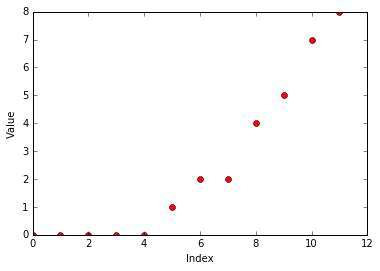

In [72]:

# ===== Problem 2f =====
# Without using a loop, sort all of the values 
# of M in increasing order and plot them.
# Note we want you to use newM from e.

# BEGIN YOUR CODE HERE
newM_sorted = np.sort(newM, None)
print ('(d) = %s' % newM_sorted)

plt.xlabel('Index')
plt.ylabel('Value')
plt.plot(newM_sorted, 'ro')
plt.show()
# END YOUR CODE HERE


 ## 3. Basic Image Manipulations

In [73]:
import numpy as np
import numpy.matlib as matlib
import matplotlib.pyplot as plt
from scipy import misc

%matplotlib inline

In [74]:
# ===== Problem 3a =====
# Read in the images, image1.jpg and image2.jpg, as color images.

img1, img2 = None, None

# BEGIN YOUR CODE HERE

img1 = misc.imread('image1.jpg')
img2 = misc.imread('image2.jpg')

# END YOUR CODE HERE

In [75]:
# ===== Problem 3b =====
# Convert the images to double precision and rescale them
# to stretch from minimum value 0 to maximum value 1.

# BEGIN YOUR CODE HERE

def rescale(img):
    min_value = img.min(axis=None)
    t_img = img - min_value
    max_value = t_img.max(axis=None)
    t_img /= max_value
    return t_img

img1_double = img1.astype(np.float64)
rescaled_img1 = rescale(img1_double)

img2_double = img2.astype(np.float64)
rescaled_img2 = rescale(img2_double)

# END YOUR CODE HERE


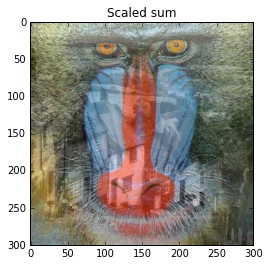

In [77]:
# ===== Problem 3c =====
# Add the images together and re-normalize them 
# to have minimum value 0 and maximum value 1. 
# Display this image.

# BEGIN YOUR CODE HERE

sum_img = rescale(img1.astype(np.float64) + img2.astype(np.float64))
plt.title('Scaled sum')
plt.imshow(sum_img)
plt.show()

# END YOUR CODE HERE

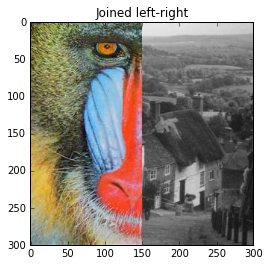

In [81]:
# ===== Problem 3d =====
# Create a new image such that the left half of 
# the image is the left half of image1 and the 
# right half of the image is the right half of image2.

newImage1 = None

# BEGIN YOUR CODE HERE

img1_shape = img1.shape
img2_shape = img2.shape

img1_left = img1[:, 0:img1_shape[1]/2, :]
img2_right = img2[:, img2_shape[1]/2:, :]

newImage1 = np.append(img1_left, img2_right, axis=1)
plt.title('Joined left-right')
plt.imshow(newImage1)
plt.show()

# END YOUR CODE HERE

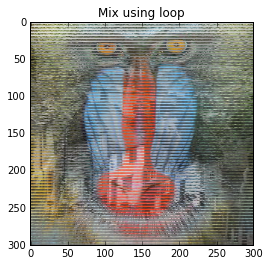

In [82]:
# ===== Problem 3e =====
# Using a for loop, create a new image such that every odd 
# numbered row is the corresponding row from image1 and the 
# every even row is the corresponding row from image2. 
# Hint: Remember that indices start at 0 and not 1 in Python.

newImage2 = None

# BEGIN YOUR CODE HERE

newImage2 = np.zeros_like(img1)
for i in range(0, img1.shape[0]):
    if i%2 == 0:
        newImage2[i, :, : ] = img1[i, :, :]
    else:
        newImage2[i, :, : ] = img2[i, :, :]

plt.title('Mix using loop')
plt.imshow(newImage2)
plt.show()

# END YOUR CODE HERE

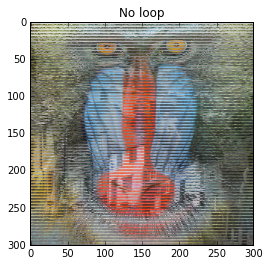

In [83]:
# ===== Problem 3f =====
# Accomplish the same task as part e without using a for-loop.
# The functions reshape and repmat may be helpful here.

newImage3 = None

# BEGIN YOUR CODE HERE

shape = img1.shape

zeros = np.zeros(shape[0]*shape[2], dtype=np.uint8)
ones = np.ones(shape[0]*shape[2], dtype=np.uint8)

odd_mask = np.append(ones, zeros, axis=0)
odd_mask = matlib.repmat(odd_mask, 1, shape[1]/2)
odd_mask = np.reshape(odd_mask, (shape[0], shape[1], shape[2]))

even_mask = np.append(zeros, ones, axis=0)
even_mask = matlib.repmat(even_mask, 1, shape[1]/2)
even_mask = np.reshape(even_mask, (shape[0], shape[1], shape[2]))


newImage3 = np.multiply(img1, odd_mask) + np.multiply(img2, even_mask)

plt.title('No loop')
plt.imshow(newImage3)
plt.show()


# END YOUR CODE HERE

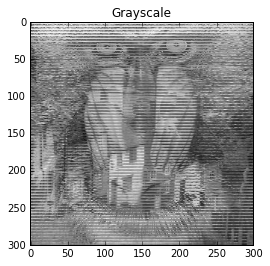

In [91]:
# ===== Problem 3g =====
# Convert the result from part f to a grayscale image. 
# Display the grayscale image with a title.

# BEGIN YOUR CODE HERE
newImage3GrayScale = np.average(newImage3, axis=2, weights=[299, 587, 114])

plt.title('Grayscale')
plt.imshow(newImage3GrayScale, cmap='gray')
plt.show()
# END YOUR CODE HERE

## 4. Singular Value Decomposition

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

In [96]:
# ===== Problem 4a =====
# Read in image1 as a grayscale image. Take the singular value
# decomposition of the image.

img1 = None

# BEGIN YOUR CODE HERE
img1 = misc.imread('image1.jpg', flatten=True, mode="L")
U, s, V = np.linalg.svd(img1)
# END YOUR CODE HERE


In [101]:
# ===== Problem 4b =====
# Save and display the best rank 1 approximation 
# of the (grayscale) image1.

rank1approx = None

# BEGIN YOUR CODE HERE
rank1approx =  s[0] * np.dot(U[0,:], V[0,:].T) 

print(rank1approx)
# END YOUR CODE HERE


-1264.81
